In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB


from sklearn import metrics
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, precision_score
from sklearn.metrics import confusion_matrix, f1_score, recall_score

from sklearn.svm import SVC

from sklearn.metrics import precision_recall_curve

from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape

(150, 6)

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_2812\789205228.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SepalLengthCm'])


<Axes: xlabel='SepalLengthCm', ylabel='Density'>

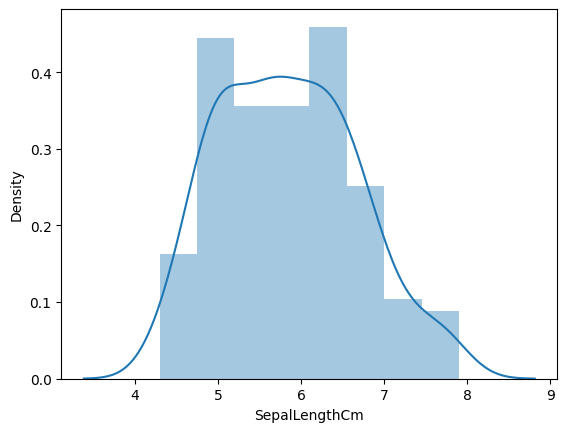

In [8]:
sns.distplot(df['SepalLengthCm'])

C:\Users\HP\AppData\Local\Temp\ipykernel_20964\2781944064.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PetalLengthCm'])


<Axes: xlabel='PetalLengthCm', ylabel='Density'>

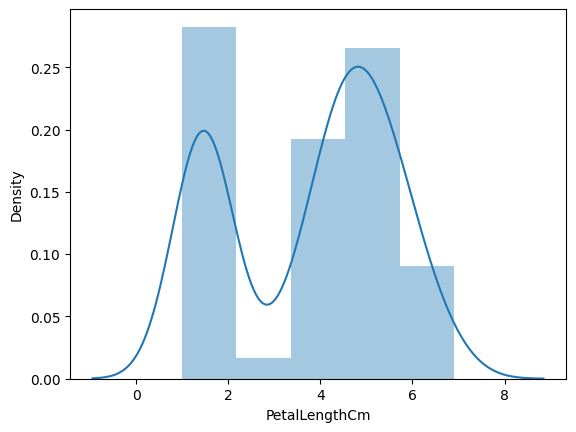

In [9]:
sns.distplot(df['PetalLengthCm'])

C:\Users\HP\AppData\Local\Temp\ipykernel_20964\3666008087.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PetalWidthCm'])


<Axes: xlabel='PetalWidthCm', ylabel='Density'>

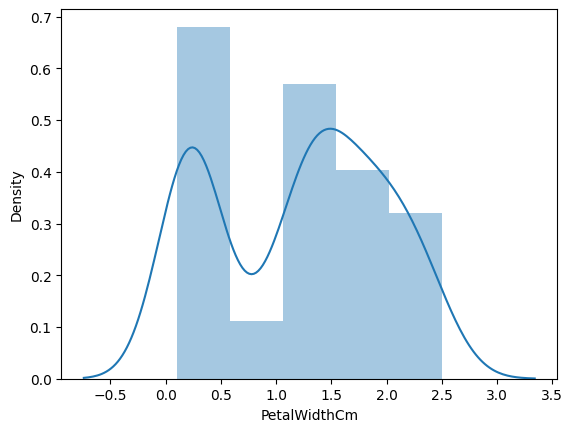

In [10]:
sns.distplot(df['PetalWidthCm'])

C:\Users\HP\AppData\Local\Temp\ipykernel_20964\3402425195.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SepalWidthCm'])


<Axes: xlabel='SepalWidthCm', ylabel='Density'>

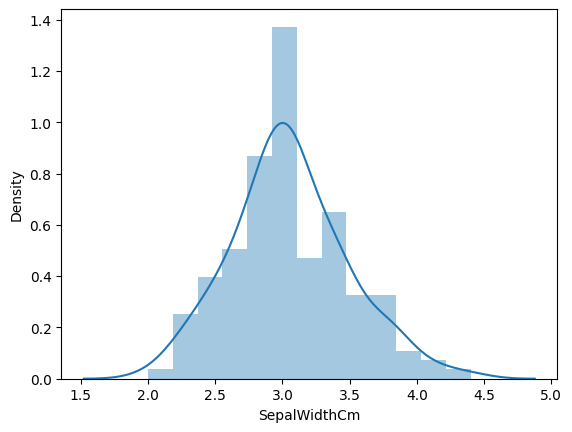

In [11]:
sns.distplot(df['SepalWidthCm'])

In [12]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [13]:
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [14]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

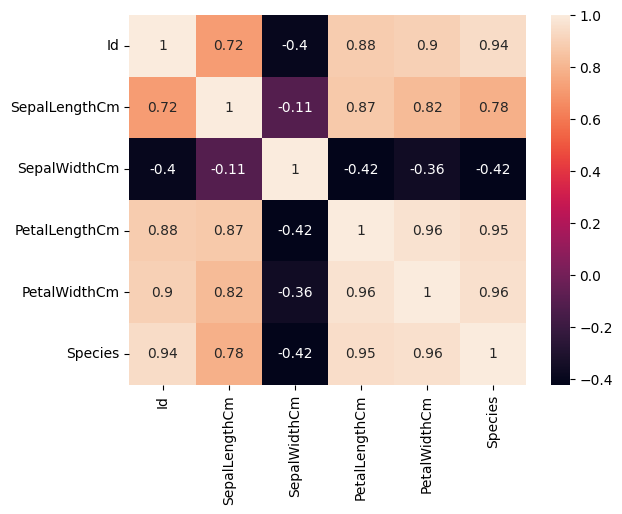

In [15]:
sns.heatmap(df.corr(), annot=True)

In [16]:
# X = df['Species'].values
# Y = df['PetalWidthCm'].values

X = df.iloc[:,:4].values
Y = df['Species'].values

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = True) 

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
gauss = GaussianNB()
gauss.fit(X_train, Y_train)
Y_pred = gauss.predict(X_test)


In [25]:
# print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))
Y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [26]:
Y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [27]:
accuracy_score(Y_test, Y_pred)

1.0

In [28]:
print(f'Classification Report : \n {classification_report(Y_test, Y_pred)}')

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



<Axes: >

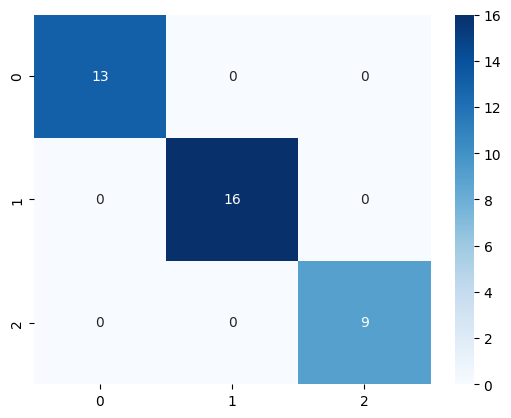

In [29]:
# 

confu_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(confu_mat, annot=True, fmt='d', cmap='Blues', cbar=True)

In [34]:
tp, fn, fp, tn = confusion_matrix(Y_test,Y_pred,labels=[1,0]).reshape(-1)

print('Error Rate : ',(fp + fn)/(fp + tn + fn + fp))
print('Sensitivity (Recall or True Positive rate) : ', tp/(tp + fn))
print('Specificity (True Negative rate) : ', tn/(fp + tn))
print('Precision (Positive Predictive value) : ', tp/(tp + fp))
print('False Psitive Rate : ', fp/(tn + fp))

Error Rate :  0.0
Sensitivity (Recall or True Positive rate) :  1.0
Specificity (True Negative rate) :  1.0
Precision (Positive Predictive value) :  1.0
False Psitive Rate :  0.0


In [42]:
# gauss = SVC(probability=True)

# Y_pred_proba = gauss.predict_proba(X_test)[:,1]
# gauss.fit(X_train, Y_train)
# precision, recall, thresolds = precision_recall_curve(Y_test, Y_pred_proba)

# fig, ax = plt.subplots(figsize=(6,6))
# ax.plot(recall, precision, label='Naive Bayes Classification', color='firebrick')
# ax.set_title('Precision Recall Curve')
# ax.set_xlabel('Recall')
# ax.set_ylabel('Precision')
# plt.box(False)
# ax.legend();